In [10]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def pf(ax, xrange, y, z, col="k"):
    rand = np.random.rand
    xs = rand(2) * 0 + np.array(xrange)
    ys = np.tile(y, 2)
    zs = np.tile(z, 2)
    ax.plot(xs, ys, zs, col)
    return np.array([xs[0], ys[0], zs[0]])

In [11]:
def add_soma(ax, somc, r=15):

    import scipy.ndimage

    u = np.linspace(0, 2 * np.pi, 13)
    v = np.linspace(0, np.pi, 7)

    x = r * np.outer(np.cos(u), np.sin(v)) + somc[0]
    y = r * np.outer(np.sin(u), np.sin(v)) + somc[1]
    z = r * np.outer(np.ones(np.size(u)), np.cos(v)) + somc[2]

    # use scipy to interpolate
    xdata = scipy.ndimage.zoom(x, 3)
    ydata = scipy.ndimage.zoom(y, 3)
    zdata = scipy.ndimage.zoom(z, 3)

    ax.plot_surface(xdata, ydata, zdata, rstride=3, cstride=3, color=ncol, shade=0)


def add_soma_p(ax, somc, r=15):

    import scipy.ndimage

    u = np.linspace(0, 2 * np.pi, 13)
    v = np.linspace(0, np.pi, 7)

    x = r * np.outer(np.cos(u), np.sin(v)) + somc[0]
    y = r * np.outer(np.sin(u), np.sin(v)) + somc[1]
    z = r * np.outer(np.ones(np.size(u)), np.cos(v)) + somc[2]

    # use scipy to interpolate
    xdata = scipy.ndimage.zoom(x, 3)
    ydata = scipy.ndimage.zoom(y, 3)
    zdata = scipy.ndimage.zoom(z, 3)

    ax.plot_surface(
        xdata * 0 + 475, ydata, zdata, rstride=3, cstride=3, color=ncol, shade=0
    )


def pt3dadd(ax, pt1, pt2, r):
    ax.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], [pt1[2], pt2[2]], ncol, linewidth=r)
    if type(pt2) == list:
        return np.array(pt2)
    else:
        return pt2


def pt3dadd_p(ax, pt1, pt2, r):
    ax.plot([475, 475], [pt1[1], pt2[1]], [pt1[2], pt2[2]], ncol, linewidth=r)
    if type(pt2) == list:
        return np.array(pt2)
    else:
        return pt2


def plot_dends(ax, somc):
    main_dend_end = dend_plot(ax, somc, [somc[0], somc[1], somc[2] + 50], 6)
    dend1_end = dend_plot(
        ax, main_dend_end, [somc[0] + 5, somc[1] - 50, somc[2] + 50 + 75], 3
    )
    dend11_end = dend_plot(
        ax, dend1_end, [somc[0] + 10, somc[1] - 50 + 30, somc[2] + 100 + 75 + 125], 2
    )
    dend12_end = dend_plot(
        ax, dend1_end, [somc[0], somc[1] - 50 - 30, somc[2] + 100 + 75 + 125], 2
    )
    dend2_end = dend_plot(
        ax, main_dend_end, [somc[0] + 5, somc[1] + 50, somc[2] + 50 + 75], 3
    )
    dend21_end = dend_plot(
        ax, dend2_end, [somc[0], somc[1] + 50 + 30, somc[2] + 100 + 75 + 125], 2
    )
    dend22_end = dend_plot(
        ax, dend2_end, [somc[0] + 10, somc[1] + 50 - 30, somc[2] + 100 + 75 + 125], 2
    )


def gcell(ax, somc=[775, 350, 100]):
    _ = soma_plot(ax, somc)
    plot_dends(ax, somc)

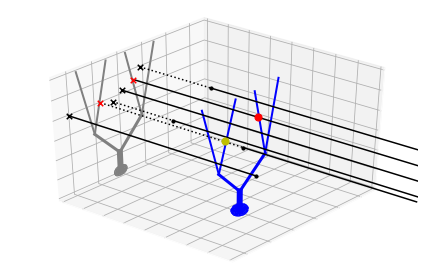

In [13]:
plt.close("all")
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.view_init(azim=-50, elev=35)

ncol = "grey"
soma_plot = add_soma_p
dend_plot = pt3dadd_p
gcell(ax)

ncol = "b"
soma_plot = add_soma
dend_plot = pt3dadd
gcell(ax)


yshift = 10
pf(ax, [650, 1200], 390 + yshift, 350, "k")
pf(ax, [475, 650], 390 + yshift, 350, ":k")
pf(ax, [475, 1200], 375 + yshift, 325)
pf(ax, [475, 1200], 350 + yshift, 310)
pf(ax, [475, 625], 330 + yshift, 290, ":k")
pf(ax, [625, 1200], 330 + yshift, 290)
pf(ax, [820, 1200], 305 + yshift, 300)
pf(ax, [475, 820], 305 + yshift, 300, ":k")

pf(ax, [475, 920], 240 + yshift, 300)


endpoint = lambda xs, ys, zs: ax.scatter(xs, ys, zs, s=10, c="k", depthshade=False)
crosspoint = lambda xs, ys, zs: ax.scatter(xs, ys, zs, s=50, c="r", depthshade=False)

falsecrosspoint = lambda xs, ys, zs: ax.scatter(
    xs, ys, zs, s=50, c="y", depthshade=False
)

endpoint(
    [650, 625, 820, 920], np.array([390, 330, 305, 240]) + yshift, [350, 290, 300, 300]
)

crosspoint([775], [378 + yshift], [322])
falsecrosspoint([775], [308 + yshift], [300])

projectedpoint = lambda ys, zs: ax.scatter(
    np.tile(475, len(ys)), ys, zs, s=30, marker="x", c="k", depthshade=False
)

projectedpoint(np.array([240, 330, 350, 390]) + yshift, [300, 290, 310, 350])

projectedpoint = lambda ys, zs: ax.scatter(
    np.tile(475, len(ys)), ys, zs, s=30, marker="x", c="r", depthshade=False
)
projectedpoint(np.array([305, 375]) + yshift, [300, 325])


ax.set(
    xlim=[550, 950],
    ylim=[175, 475],
    zlim=[150, 450],
    xticklabels=[],
    yticklabels=[],
    zticklabels=[],
)

ax.w_xaxis.line.set_color("w")
ax.w_yaxis.line.set_color("w")
ax.w_zaxis.line.set_color("w")
ax.xaxis._axinfo["tick"]["color"] = "w"
ax.yaxis._axinfo["tick"]["color"] = "w"
ax.zaxis._axinfo["tick"]["color"] = "w"

plt.tight_layout()
plt.savefig("project.jpg", dpi=300)
plt.savefig("project.pdf", dpi=300)